In [203]:
# Import Dependencies
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline


In [204]:
#  Notebook exeercising API
freedom_csv_path = "data/indexfreedom.csv"
#happy_csv_path = "data/TBD"

In [205]:
# READ freedom.csv

freedom_df = pd.read_csv(freedom_csv_path, encoding="utf-8")
freedom_df

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


In [206]:
# keep only the ef_score and pf_score
scores_df= freedom_df[['countries','pf_score','ef_score']]
# scores_df

In [207]:
# qcut quartiles in a clean way

cut_labels = ['10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd','1st']
cut_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
freedom_df['Quartile_pf'] = pd.cut(freedom_df['pf_score'], bins=cut_bins, labels=cut_labels)

In [208]:
freedom_df.Quartile_pf = freedom_df.Quartile_pf.astype('str')

In [209]:
freedom_df.Quartile_pf.sort_values()

873     1st
250     1st
1274    1st
1273    1st
256     1st
       ... 
660     nan
1220    nan
1271    nan
1270    nan
784     nan
Name: Quartile_pf, Length: 1458, dtype: object

In [210]:
freedom_df= freedom_df[~freedom_df.Quartile_pf.isin(['nan'])]

Text(0, 0.5, 'Economic Freedom Score')

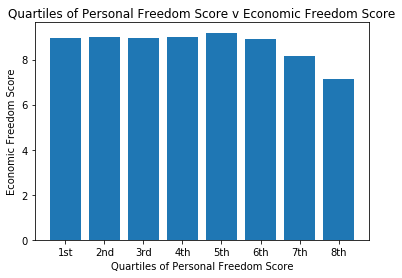

In [211]:
plt.bar(freedom_df["Quartile_pf"].sort_values(),freedom_df["ef_score"])
plt.title("Quartiles of Personal Freedom Score v Economic Freedom Score")
plt.xlabel("Quartiles of Personal Freedom Score")
plt.ylabel("Economic Freedom Score")
# Quartile_pf = \
#     pd.qcut(x=freedom_df.pf_score, q=10, labels=['10th', '9th', '8th' , '7th','6th', '5th','4th','3rd','2nd','1st' ])

In [212]:


plt.savefig("pf_quartiles_v_efscores.png")

<Figure size 432x288 with 0 Axes>

In [213]:
scores_df.groupby(["countries"])["pf_score","ef_score"].mean()

,pf_score,ef_score
countries,,
Albania,7.696934,7.348889
Algeria,5.249383,5.032222
Angola,5.856932,5.142222
Argentina,8.120779,5.233333
Armenia,7.192095,7.634444
...,...,...
Venezuela,6.206929,3.634444
Vietnam,6.329929,6.335556
"Yemen, Rep.",3.094367,6.280000


In [214]:
import matplotlib.pyplot as plt

In [215]:
# plot
# first turn columns into lists
pf_score = scores_df["pf_score"].values
ef_score = scores_df["ef_score"].values
countries = scores_df["countries"].values


In [216]:
from scipy.stats import linregress

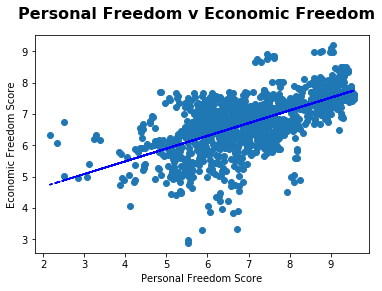

<Figure size 432x288 with 0 Axes>

In [217]:
x_axis = pf_score
y_axis = ef_score

mask = ~np.isnan(pf_score) & ~np.isnan(ef_score)

(slope, intercept, r_value, p_value, se) = linregress(x_axis[mask], y_axis[mask])
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Personal Freedom v Economic Freedom", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Personal Freedom Score")
ax.set_ylabel("Economic Freedom Score")

plt.plot(x_axis, y_axis, linewidth=0, marker='o')
plt.plot(x_axis, fit, 'b--')

plt.show()
plt.savefig("PFScorevEFScoreRegress")


In [218]:
print(f"r_value, {r_value * r_value}")

r_value, 0.4006136147288296


In [219]:
print(f'pvalue, {p_value}')

pvalue, 3.917852733546711e-155


In [220]:
scores_df.columns

Index(['countries', 'pf_score', 'ef_score'], dtype='object')

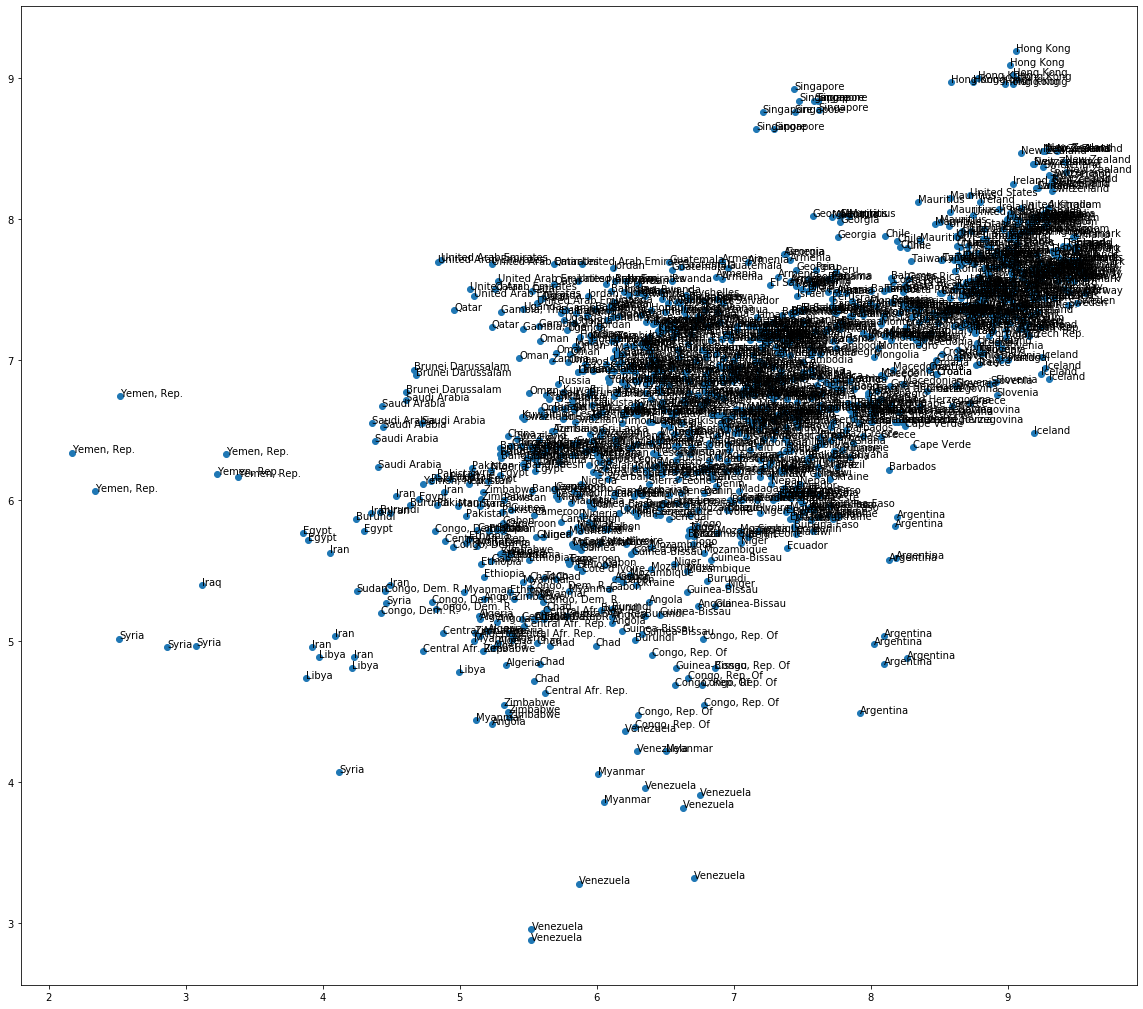

In [221]:
# create plot
# just a cool thing that we didn't use so I didn't fix but I don't want to delete
# fig, ax = plt.subplots()
# ax.scatter(pf_score, ef_score)

plt.figure(figsize=(20,18))
plt.scatter(scores_df.pf_score,scores_df.ef_score)



for i, txt in enumerate(countries):
    plt.annotate(txt, (scores_df.pf_score[i],scores_df.ef_score[i]))
    


Text(0, 0.5, 'Economic Freedom')

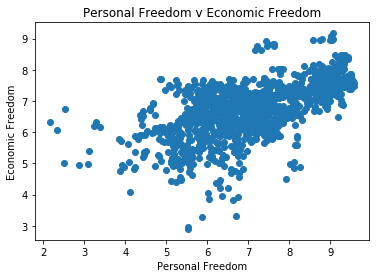

In [222]:
# with out labels bc idk how to clean it up
fig, ax = plt.subplots()
ax.scatter(pf_score, ef_score)
plt.title("Personal Freedom v Economic Freedom")
plt.xlabel("Personal Freedom")
plt.ylabel("Economic Freedom")

In [223]:
import scipy.stats as stats